zomato data analysis project

importing libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

create tha dataframe

In [6]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [7]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


convert tha data type of column - rate 

In [8]:
def handle_rate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handle_rate)
print(dataframe.head())
    


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


 type of restaurant do the majority of customers order from

Text(0.5, 0, 'type of restaurant')

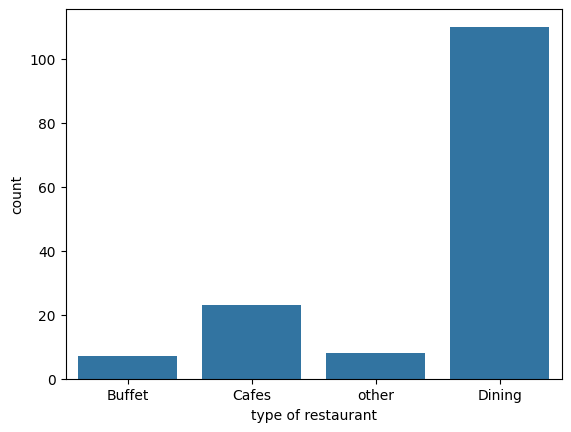

In [11]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

votes has each type of restaurant received from customers

Text(0, 0.5, 'votes')

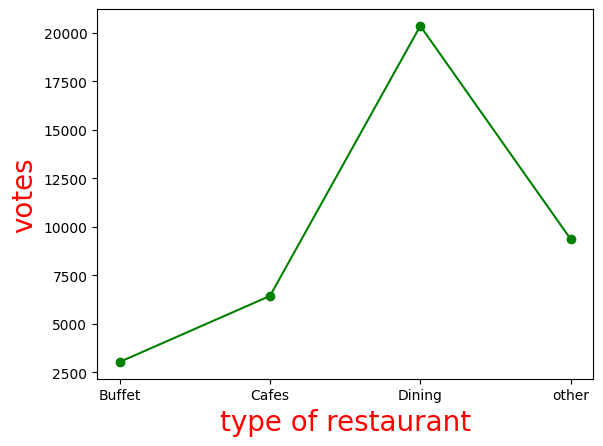

In [21]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c= "green" ,marker= "o")
plt.xlabel("type of restaurant",c="red",size=20)
plt.ylabel("votes",c="red",size=20)


the ratings that the majority of restaurants have received

<function matplotlib.pyplot.show(close=None, block=None)>

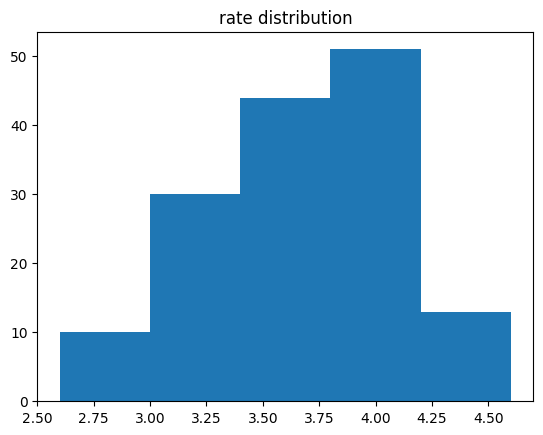

In [26]:
plt.hist(dataframe['rate'],bins=5)
plt.title("rate distribution")
plt.show

average spending on each order

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

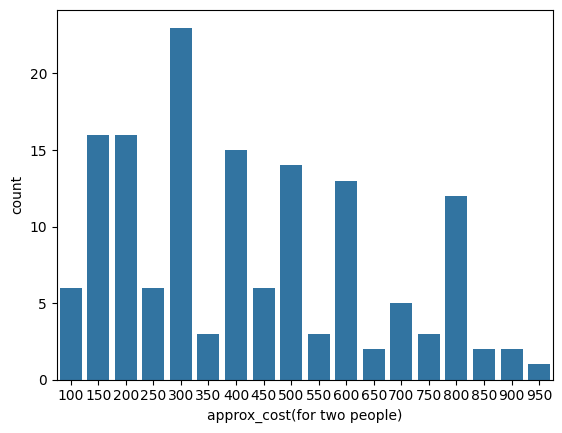

In [28]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

mode (online or offline) has received the maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

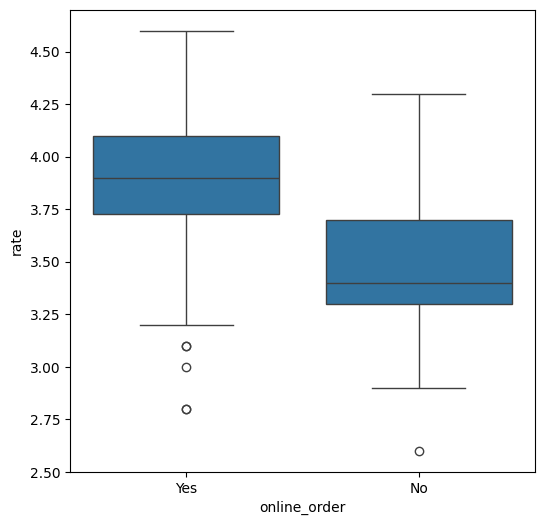

In [29]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order',y = 'rate',data= dataframe)

 type of restaurant received more offline orders

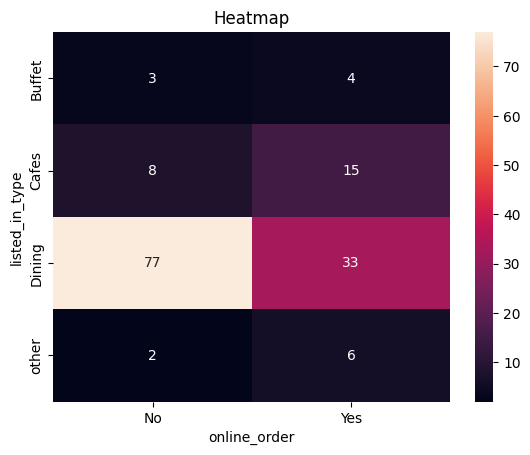

In [38]:
pivot_table =dataframe.pivot_table(index= 'listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot =True,fmt='d')
plt.title('Heatmap')
plt.xlabel('online_order')
plt.ylabel('listed_in_type')
plt.show()